In [4]:
import cv2
import imutils
import numpy as np
import os


class TemplateMatching:
    def __init__(self, image_path, template_path):
        self.image_path = image_path
        self.template_path = template_path

        self.image = cv2.imread(self.image_path, 0)
        self.template = cv2.imread(self.template_path, 0)

    def template_matching(self):
        img2 = self.image.copy()
        w, h = self.template.shape[::-1]

        img = img2.copy()
        res = cv2.matchTemplate(img, self.template, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img, top_left, bottom_right, 255, 2)

        cv2.imwrite(os.path.join("template_found.jpg"), img)

    def multiscale_template_matching(self):
        template = cv2.Canny(self.template, 50, 200)
        (tH, tW) = self.template.shape[:2]

        gray = self.image
        found = None
        # loop over the scales of the image
        for scale in np.linspace(0.2, 1.0, 20)[::-1]:
            # resize the image according to the scale, and keep track
            # of the ratio of the resizing
            resized = imutils.resize(gray, width=int(gray.shape[1] * scale))
            r = gray.shape[1] / float(resized.shape[1])
            # if the resized image is smaller than the template, then break
            # from the loop
            if resized.shape[0] < tH or resized.shape[1] < tW:
                break
                # detect edges in the resized, grayscale image and apply template
                # matching to find the template in the image
            edged = cv2.Canny(resized, 50, 200)
            result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

            # if we have found a new maximum correlation value, then update
            # the bookkeeping variable
            if found is None or maxVal > found[0]:
                found = (maxVal, maxLoc, r)
        # unpack the bookkeeping variable and compute the (x, y) coordinates
        # of the bounding box based on the resized ratio
        (_, maxLoc, r) = found
        (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
        (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
        # draw a bounding box around the detected result and display the image
        cv2.rectangle(self.image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.imshow("Image", self.image)
        cv2.waitKey(0)
        # #template matching
image_path_src = os.path.join("test.jpg")
template_obj = TemplateMatching(image_path_src,image_path_src)
template_obj.template_matching()

In [5]:
import matplotlib.pyplot as plt
def plt_imshow(image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.grid(False)
	plt.show()

In [6]:
image0 = cv2.imread("test.jpg")
image1 = cv2.imread("template_found.jpg")

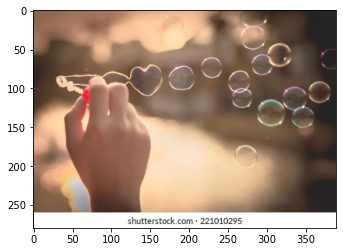

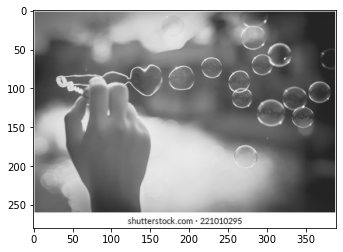

In [7]:
plt_imshow(image0)
plt_imshow(image1)